In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn import preprocessing
from sklearn.metrics import r2_score 
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv(r"C:\Users\BAPS\Desktop\Python\Datasets\airbnb_nyc_clean.csv")

In [3]:
df_o=df

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69305 entries, 0 to 69304
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              69305 non-null  int64  
 1   name                            69305 non-null  object 
 2   host_id                         69305 non-null  int64  
 3   host_identity_verified          69305 non-null  object 
 4   host_name                       69305 non-null  object 
 5   neighbourhood_group             69305 non-null  object 
 6   neighbourhood                   69305 non-null  object 
 7   lat                             69305 non-null  float64
 8   long                            69305 non-null  float64
 9   instant_bookable                69305 non-null  bool   
 10  cancellation_policy             69305 non-null  object 
 11  room_type                       69305 non-null  object 
 12  construction_year               

In [5]:
encoder=LabelEncoder()

In [6]:
df['room_type']=encoder.fit_transform(df["room_type"])
df['host_identity_verified']=encoder.fit_transform(df['host_identity_verified'])
df['neighbourhood_group']=encoder.fit_transform(df['neighbourhood_group'])
df['instant_bookable']=encoder.fit_transform(df["instant_bookable"])
df['cancellation_policy']=encoder.fit_transform(df['cancellation_policy'])

In [7]:
df=df.drop(["name","host_name","last_review","house_rules","neighbourhood"],axis=1)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,69305.0,2.015746e+07,1.109105e+07,1.001254e+06,1.057049e+07,2.013964e+07,2.970878e+07,5.736355e+07
host_id,69305.0,4.929192e+10,2.854010e+10,1.303496e+08,2.459948e+10,4.915407e+10,7.406137e+10,9.876313e+10
host_identity_verified,69305.0,4.981747e-01,5.000003e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
neighbourhood_group,69305.0,1.694697e+00,7.686004e-01,0.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00
lat,69305.0,4.072807e+01,5.597270e-02,4.049979e+01,4.068854e+01,4.072265e+01,4.076273e+01,4.091697e+01
long,69305.0,-7.394904e+01,5.046980e-02,-7.424984e+01,-7.398279e+01,-7.395439e+01,-7.393138e+01,-7.370522e+01
instant_bookable,69305.0,4.969050e-01,4.999940e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
cancellation_policy,69305.0,9.972441e-01,8.152392e-01,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00
room_type,69305.0,9.456893e-01,1.029096e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00
construction_year,69305.0,2.012490e+03,5.756144e+00,2.003000e+03,2.008000e+03,2.012000e+03,2.017000e+03,2.022000e+03


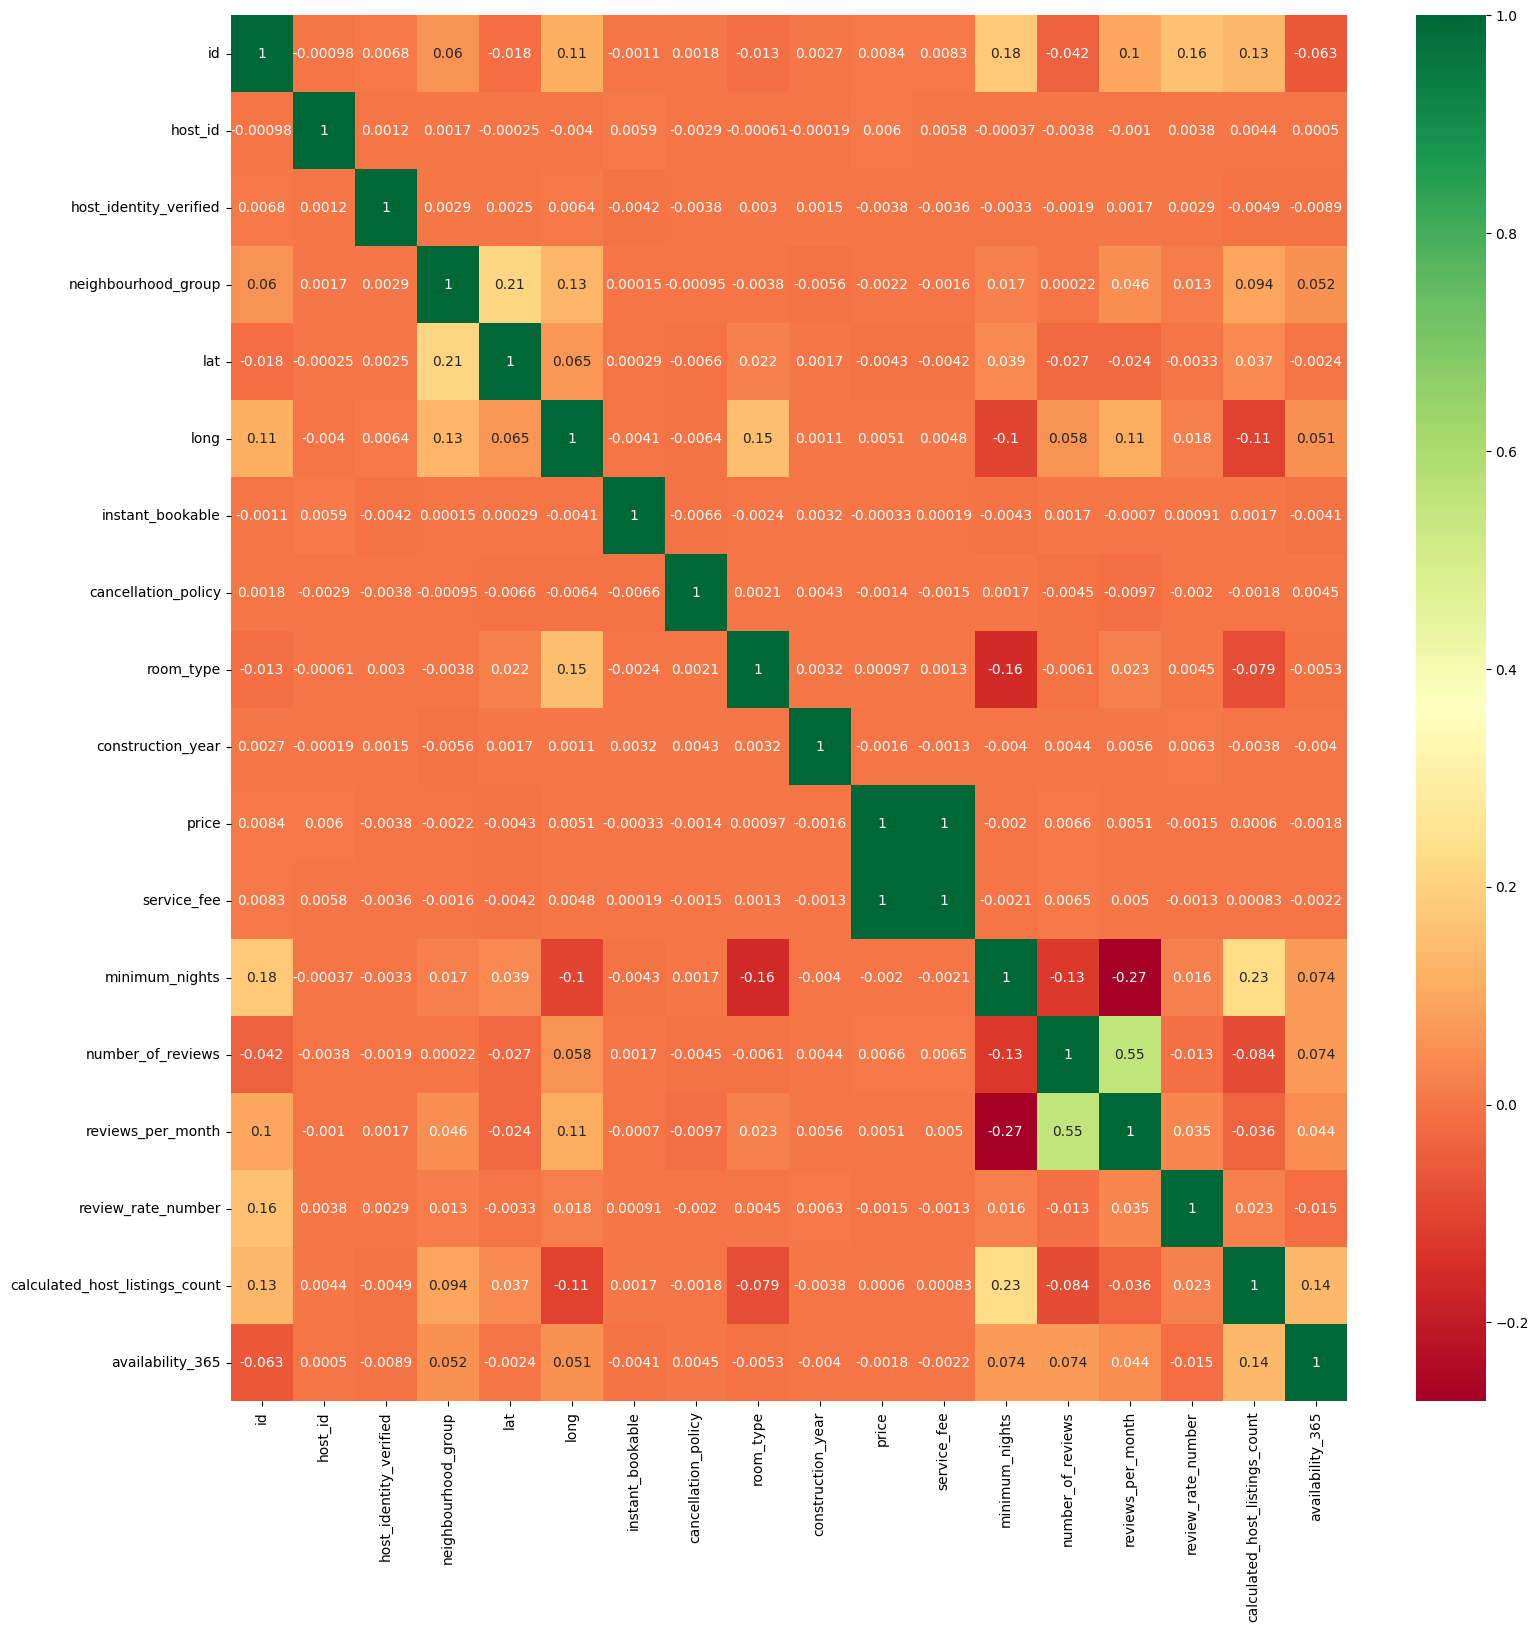

In [9]:
corr=df.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corr,cmap='RdYlGn',annot=True)
plt.show()

In [10]:
df.skew()

id                                0.021827
host_id                           0.004266
host_identity_verified            0.007301
neighbourhood_group               0.341110
lat                               0.214486
long                              1.246571
instant_bookable                  0.012381
cancellation_policy               0.005055
room_type                         0.225418
construction_year                 0.004561
price                             0.001848
service_fee                       0.002785
minimum_nights                    1.163166
number_of_reviews                 3.924162
reviews_per_month                 8.976864
review_rate_number               -0.137604
calculated_host_listings_count    6.538789
availability_365                  0.359776
dtype: float64

In [11]:
df.kurt()

id                                 -1.139152
host_id                            -1.203777
host_identity_verified             -2.000004
neighbourhood_group                -0.198986
lat                                 0.154057
long                                4.127319
instant_bookable                   -1.999904
cancellation_policy                -1.495352
room_type                          -1.795334
construction_year                  -1.202227
price                              -1.188310
service_fee                        -1.187747
minimum_nights                     -0.254952
number_of_reviews                  25.873871
reviews_per_month                 311.589104
review_rate_number                 -1.111552
calculated_host_listings_count     47.551994
availability_365                   -1.328753
dtype: float64

In [12]:
print('Before outlier removal : ',df.shape)
z = np.abs(zscore(df, axis = 1))
z1=pd.DataFrame(z,columns=df.columns)
threshold = 4.1231056
dataset = df[(z < threshold).all(axis=1)]
print('After Z-Score approach : ',dataset.shape)

Before outlier removal :  (69305, 18)
After Z-Score approach :  (61114, 18)


In [13]:
dataset.skew()

id                               -0.050150
host_id                           0.115190
host_identity_verified            0.006284
neighbourhood_group               0.317692
lat                               0.203918
long                              1.207582
instant_bookable                  0.013418
cancellation_policy               0.002672
room_type                         0.207263
construction_year                 0.003925
price                             0.000847
service_fee                       0.001609
minimum_nights                    1.136744
number_of_reviews                 4.329392
reviews_per_month                 9.094872
review_rate_number               -0.132350
calculated_host_listings_count    6.183181
availability_365                  0.419901
dtype: float64

In [14]:
dataset.kurt()

id                                 -1.012608
host_id                            -1.180240
host_identity_verified             -2.000026
neighbourhood_group                -0.245875
lat                                 0.156476
long                                3.763489
instant_bookable                   -1.999885
cancellation_policy                -1.495818
room_type                          -1.798528
construction_year                  -1.203745
price                              -1.187695
service_fee                        -1.187408
minimum_nights                     -0.341776
number_of_reviews                  33.047667
reviews_per_month                 308.890003
review_rate_number                 -1.114014
calculated_host_listings_count     42.191854
availability_365                   -1.311454
dtype: float64

In [15]:
quantile_transformer = QuantileTransformer(output_distribution='normal')
dataset["reviews_per_month"]= quantile_transformer.fit_transform(dataset["reviews_per_month"].values.reshape(-1, 1)).flatten()

C:\Users\BAPS\AppData\Local\Temp\ipykernel_8196\4214529659.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["reviews_per_month"]= quantile_transformer.fit_transform(dataset["reviews_per_month"].values.reshape(-1, 1)).flatten()


In [16]:
quantile_transformer = QuantileTransformer(output_distribution='normal')
dataset["calculated_host_listings_count"]= quantile_transformer.fit_transform(dataset["calculated_host_listings_count"].values.reshape(-1, 1)).flatten()

C:\Users\BAPS\AppData\Local\Temp\ipykernel_8196\1380995819.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["calculated_host_listings_count"]= quantile_transformer.fit_transform(dataset["calculated_host_listings_count"].values.reshape(-1, 1)).flatten()


In [17]:
quantile_transformer = QuantileTransformer(output_distribution='normal')
dataset["number_of_reviews"]= quantile_transformer.fit_transform(dataset["number_of_reviews"].values.reshape(-1, 1)).flatten()

C:\Users\BAPS\AppData\Local\Temp\ipykernel_8196\984863019.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["number_of_reviews"]= quantile_transformer.fit_transform(dataset["number_of_reviews"].values.reshape(-1, 1)).flatten()


In [18]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

In [19]:
X=df.drop(['neighbourhood_group'],axis=1)
Y=df['neighbourhood_group']

In [20]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(55444, 17)
(13861, 17)
(55444,)
(13861,)


In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
scaled_x_train = scaler.transform(x_train)
scaled_x_test = scaler.transform(x_test)
 
scaled_x_train = pd.DataFrame(scaled_x_train,columns=x_train.columns)
scaled_x_test = pd.DataFrame(scaled_x_test,columns=x_test.columns)
 

In [22]:
lr_model=LogisticRegression()

In [23]:
lr_model.fit(scaled_x_train,y_train)

LogisticRegression()

In [24]:
y_pred = lr_model.predict(scaled_x_test)

In [25]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.98


In [26]:
# y_pred = lr_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9819637832768199

Confusion Matrix:
 [[ 367    0   36    0    0]
 [   0 5490    2   62    0]
 [  12    5 5966    0    0]
 [   0  122   11 1664    0]
 [   0    0    0    0  124]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94       403
           1       0.98      0.99      0.98      5554
           2       0.99      1.00      0.99      5983
           3       0.96      0.93      0.94      1797
           4       1.00      1.00      1.00       124

    accuracy                           0.98     13861
   macro avg       0.98      0.96      0.97     13861
weighted avg       0.98      0.98      0.98     13861

